<a href="https://colab.research.google.com/github/jordanglean/cnn-horse-or-human-binary-classification/blob/main/cnn_horse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# fetch data
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-04-25 06:43:44--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.207, 142.251.161.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   251MB/s    in 0.6s    

2024-04-25 06:43:45 (251 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [32]:
# fetch validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-04-25 07:14:27--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 172.253.119.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.05s   

2024-04-25 07:14:27 (212 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [35]:
# unzip file
import zipfile

# unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

# unzip validation set
local_val_zip = './validation-horse-or-human.zip'
val_zip_ref = zipfile.ZipFile(local_val_zip, 'r')
val_zip_ref.extractall('./validation-horse-or-human')
val_zip_ref.close()

In [12]:
# explore data in directory
import os

# directory with our training horse images
train_horse_dir = os.path.join('./horse-or-human/horses')

# directory with our human training images
train_human_dir = os.path.join('./horse-or-human/humans')

In [15]:
# check file name of images

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse44-1.png', 'horse41-2.png', 'horse26-4.png', 'horse33-8.png', 'horse15-6.png', 'horse05-1.png', 'horse46-5.png', 'horse01-0.png', 'horse01-8.png', 'horse31-2.png']
['human13-02.png', 'human06-13.png', 'human04-29.png', 'human12-13.png', 'human10-08.png', 'human17-16.png', 'human15-23.png', 'human14-09.png', 'human17-00.png', 'human05-14.png']


In [18]:
# display dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for graph, outputs images in 4x4 configuration
nrows = 4
ncols = 4

# index for iterating over images
pic_index = 4

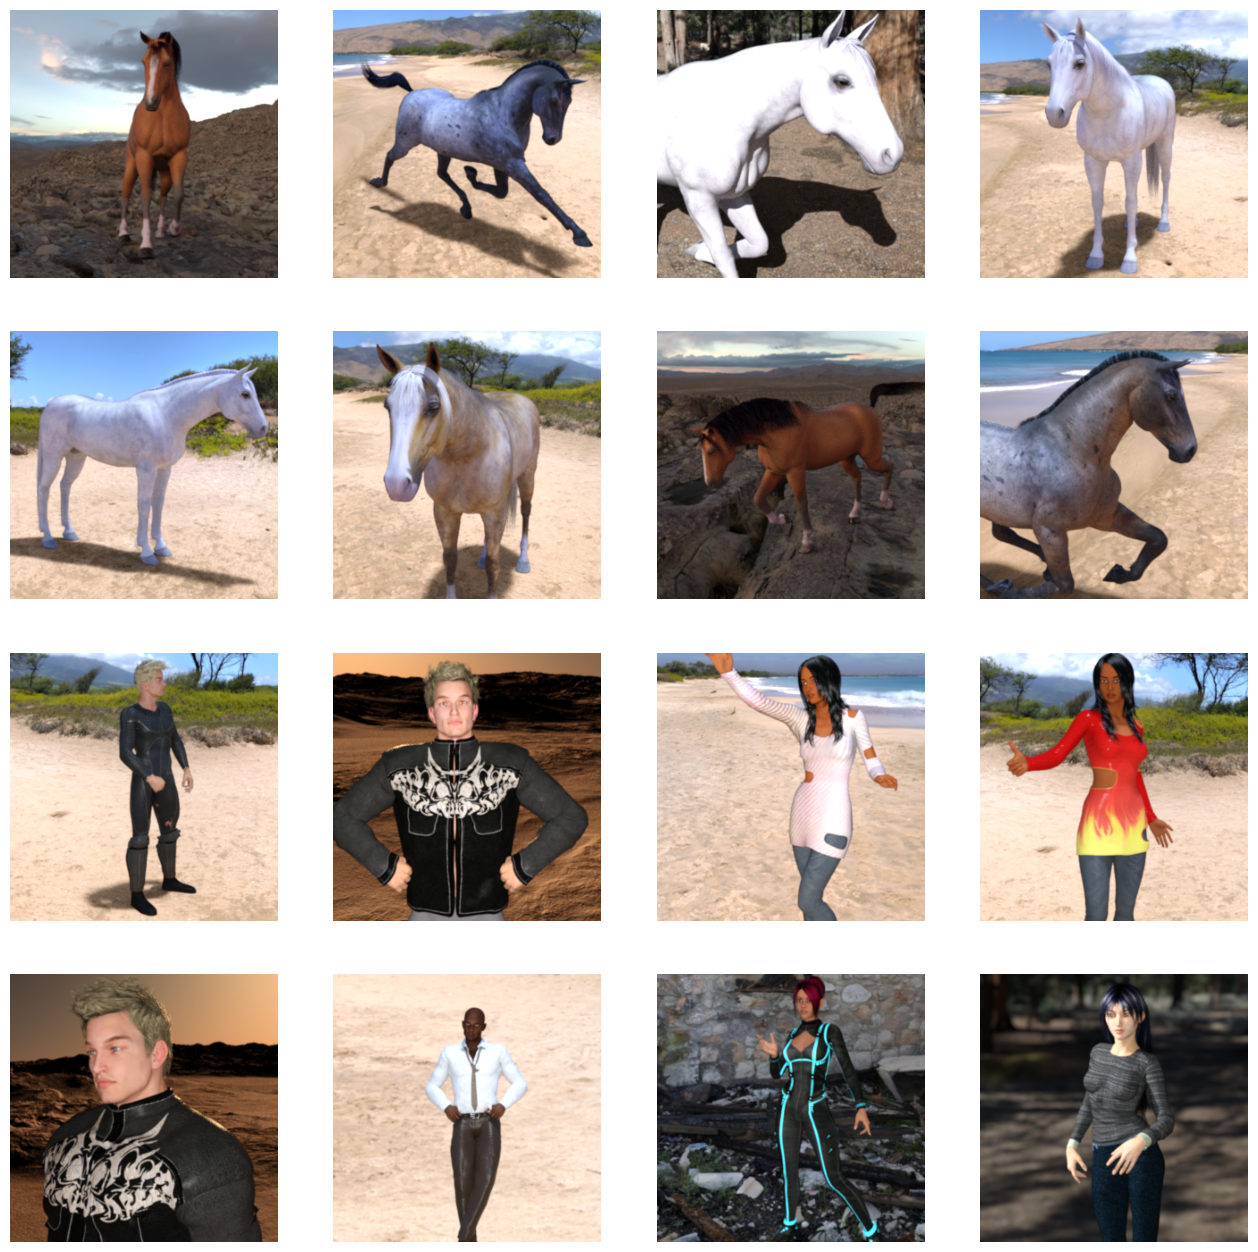

In [20]:
# set up matplotlib fig, and size to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [39]:
import tensorflow as tf
# setup callback to stop at 95% accuracy
class myCallback(tf.keras.callbacks.Callback):
  """
  Stops training once accuracy metric has reached 85% at end of epoch.
  """
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.95:
      print('\n Accuracy has reached 95%, training will stop!')
      self.model.stop_training = True

# instantiate class
callbacks = myCallback()

In [25]:
# model design
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(518),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [27]:
# compile model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [37]:
# data processing with image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalize images
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode ='binary'
)

# validation set
validation_dataget = ImageDataGenerator(rescale=1/255)

validation_generator = validation_dataget.flow_from_directory(
    './validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [40]:
# train model
model.fit(train_generator, steps_per_epoch=8, epochs=20, verbose=1,validation_data=validation_generator, validation_steps=8,callbacks=[callbacks])

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 0.1925 - accuracy: 0.9221 - val_loss: 5.1511 - val_accuracy: 0.5781
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.3014 - accuracy: 0.9110 - val_loss: 0.6499 - val_accuracy: 0.8750
Epoch 3/20
8/8 [==============================] - 8s 1s/step - loss: 0.5244 - accuracy: 0.8699 - val_loss: 0.8869 - val_accuracy: 0.8516
Epoch 4/20
7/8 [=========================>....] - ETA: 0s - loss: 0.1038 - accuracy: 0.9587
 Accuracy has reached 95%, training will stop!
8/8 [==============================] - 9s 1s/step - loss: 0.1036 - accuracy: 0.9588 - val_loss: 1.7202 - val_accuracy: 0.8125


In [43]:
# model prediction with file upload
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
	# predict images
	path = '/content/' + fn
	img = load_img(path, target_size=(300,300))
	x = img_to_array(img)
	x = x / 255
	x = np.expand_dims(x, axis=0)

	images = np.vstack([x])
	classes = model.predict(images, batch_size=10)
	print(classes[0])

	if classes[0]>0.5:
		print(fn + "is a human")
	else:
		print(fn + "is a horse")

Saving istockphoto-483797166-612x612.jpg to istockphoto-483797166-612x612.jpg
1/1 [==============================] - 0s 18ms/step
[7.869133e-08]
istockphoto-483797166-612x612.jpgis a horse
